In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Import the Data.

In [9]:
df = pd.read_csv(r'C:\Users\sahil\OneDrive\Desktop\Internship Assignment/Fraud.csv')

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Check if there are any null values.

In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### So basically there are no null values, but there may be zeros instead of null values.

## Exploratory Data Analysis

First, look at the types of transactions that are flagged as fraud.

In [15]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [17]:
a1 = df[(df['type']=='CASH_IN')&(df['isFraud']==1)].shape[0]
a2 = df[(df['type']=='CASH_OUT')&(df['isFraud']==1)].shape[0]
a3 = df[(df['type']=='TRANSFER')&(df['isFraud']==1)].shape[0]
a4 = df[(df['type']=='PAYMENT')&(df['isFraud']==1)].shape[0]
a5 = df[(df['type']=='DEBIT')&(df['isFraud']==1)].shape[0]

In [19]:
print(f'The number of fraudulent transactions of type CASH_IN is: {a1}.')
print(f'The number of fraudulent transactions of type CASH_OUT is: {a2}.')
print(f'The number of fraudulent transactions of type TRANSFER is: {a3}.')
print(f'The number of fraudulent transactions of type PAYMENT is: {a4}.')
print(f'The number of fraudulent transactions of type DEBIT is: {a5}.')

The number of fraudulent transactions of type CASH_IN is: 0.
The number of fraudulent transactions of type CASH_OUT is: 4116.
The number of fraudulent transactions of type TRANSFER is: 4097.
The number of fraudulent transactions of type PAYMENT is: 0.
The number of fraudulent transactions of type DEBIT is: 0.


**Out of the five types of transactions, only two were found to be fraudulent: 'TRANSFER' where money is sent to a customer/fraudster and 'CASH_OUT' where money is sent to a merchant who pays the customer / fraudster in cash.**

In [21]:
# Checking for isFlaggedFraud transactions

print(df[(df['isFlaggedFraud']==0)&(df['amount']>200000)].shape[0])

df['type'][df['isFlaggedFraud']==1].shape[0]

# So, there are only 16 transactions that are being flagged as fraudulent out of 6.3 M transactions.
# By definition, transactions over Rs 2,00,000 should be flagged as fraudulent, but they are not.

1673554


16

In [23]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [25]:
len(df[(df['type']=='TRANSFER')&(df['oldbalanceDest']==0)&(df['newbalanceDest']==0)])

4174

In all the transactions old and new destination balance is 0. So, it may not be reason because there are also many rows where this condition satisfy but transaction is not marked as flagged.

**Conclusion**: Although isFraud is always set when isFlaggedFraud is set, since isFlaggedFraud is only set  16 times in a seemingly meaningless manner, we can consider this feature unimportant and remove it from the dataset without losing any any information.

In [27]:
df.loc[df.type == 'CASH_OUT'].nameDest.str.contains('M').any()

False

In [29]:
df.loc[df.type == 'CASH_IN'].nameDest.str.contains('M').any()

False

In [31]:
df.loc[df.type == 'PAYMENT'].nameDest.str.contains('M').any()

True

In [33]:
df.loc[df.type == 'TRANSFER'].nameDest.str.contains('M').any()

False

In [35]:
df.loc[df.type == 'DEBIT'].nameDest.str.contains('M').any()

False

**Merchants are only present in destination accounts for all PAYMENTS.**

**Conclusion:** The nameOrig and nameDest features neither encode merchant accounts in the expected way, below, we drop these features from the data since they are meaningless.

## Data Cleaning

In [37]:
# We know that only TRANSFER & CASH_OUT transactions are marked as flagged. So, we are going to use only this two types of the transaction rows.

df_new = df[(df['type']=='TRANSFER')|(df['type']=='CASH_OUT')]

df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [39]:
randomState = 5
np.random.seed(randomState)

In [41]:
# Eliminate columns shown to be irrelevant for analysis in the EDA

X = df_new.drop(['nameOrig','nameDest','isFlaggedFraud','isFraud'],axis=1)
y = df_new['isFraud']

In [43]:
# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1

In [45]:
X['type'] = X['type'].astype(int)

## missing value imputation

In [47]:
df_new_fraud = X.loc[y == 1]
df_new_nonfraud = X.loc[y == 0]

- The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.538961038961039

In [49]:
len(df_new_fraud.loc[(df_new_fraud['oldbalanceDest'] == 0) & \
(df_new_fraud.newbalanceDest == 0) & (df_new_fraud.amount)]) / (1.0 * len(df_new_fraud))

0.0

- The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006018537094250291


In [51]:
len(df_new_nonfraud.loc[(df_new_nonfraud['oldbalanceDest'] == 0) & \
(df_new_nonfraud.newbalanceDest == 0) & (df_new_nonfraud.amount)]) / (1.0 * len(df_new_nonfraud))

0.0

In [53]:
# Since the destination account balances being zero is a strong indicator of fraud, we do not impute the account balance (before the transaction is made) with a statistic or from a distribution with a subsequent adjustment for the amount transacted. Doing so would mask this indicator of fraud and make fraudulent transactions appear genuine. Instead, below we replace the value of 0 with -1 which will be more useful to a suitable machine-learning (ML) algorithm detecting fraud.

X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0),['oldbalanceDest', 'newbalanceDest']] = - 1

The data also has several transactions with zero balances in the originating account both before and after a non-zero amount is transacted. In this case, the fraction of such transactions is much smaller in fraudulent (0.3%) compared to genuine transactions (47%). Once again, from similar reasoning as above, instead of imputing a numerical value we replace the value of 0 with a null value.

In [55]:
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0),['oldbalanceOrg', 'newbalanceOrig']] = np.nan

## Feature-engineering

- Motivated by the possibility of zero balances being used to distinguish between fraudulent and genuine transactions, we take data imputation one step further and two new functions to record source and destination account errors for each transaction. Create a (column). These new features have proven to be important for getting the best performance from the ML algorithms we end up using.

In [57]:
X['errorbalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorbalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

In [59]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorbalanceOrig,errorbalanceDest
2,1,0,181.00,181.0,0.0,-1.0,-1.00,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,300850.89,-2401220.0


## Data visualization

In [61]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

**Dispersion over time**

- The plot below shows how the fraudulent and genuine transactions yield different fingerprints when their dispersion is viewed over time. 
- It is clear that fradulent transactions are more homogenously distributed over time compared to genuine transactions. 
- Also apparent is that CASH-OUTs outnumber TRANSFERs in genuine transactions, in contrast to a balanced distribution between them in fraudulent transactions. 
- The width of each 'fingerprint' is set by the 'jitter' parameter in the plotStrip function above which attempts to separate out and plot transactions occuring at the same time with different abscissae.-

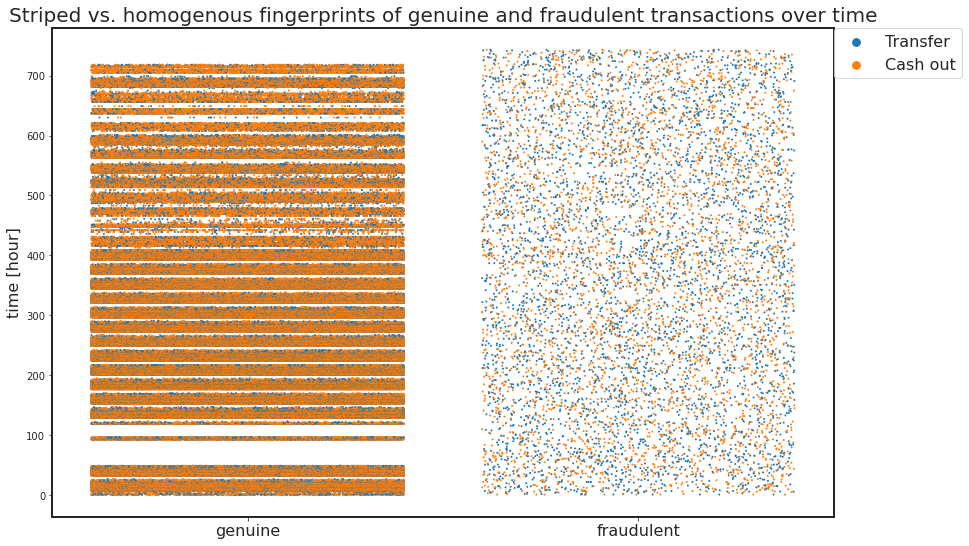

In [63]:
ax = plotStrip(y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent \
transactions over time', size = 20);

#### Dispersion over amount
- The two plots below shows that although the presence of fraud in a transaction can be discerned by the original amount feature, the new errorBalanceDest feature is more effective at making a distinction.

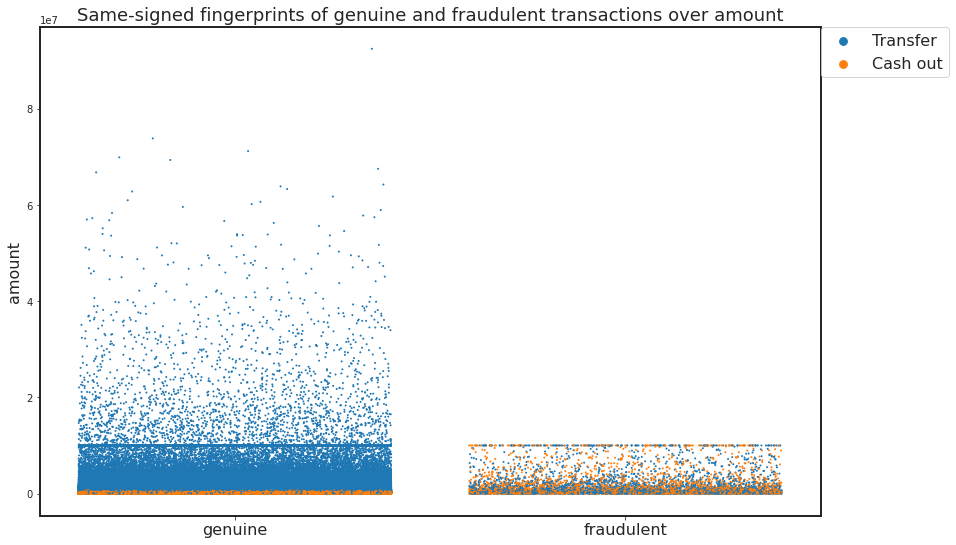

In [65]:
limit = len(X)
ax = plotStrip(y[:limit], X.amount[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('Same-signed fingerprints of genuine \
and fraudulent transactions over amount', size = 18);

#### Dispersion over error in balance in destination accounts


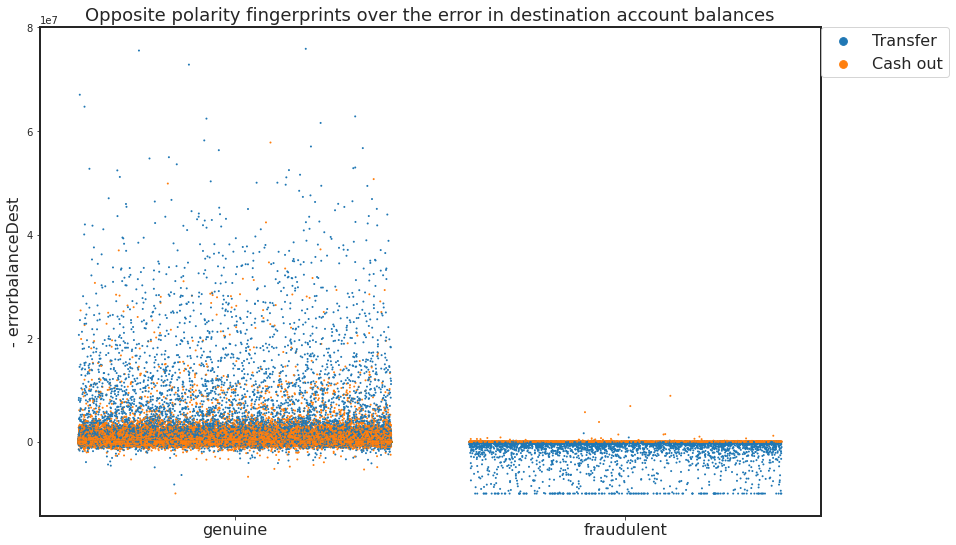

In [67]:
limit = len(X)
ax = plotStrip(y[:limit], - X.errorbalanceDest[:limit], X.type[:limit], \
              figsize = (14, 9))
ax.set_ylabel('- errorbalanceDest', size = 16)
ax.set_title('Opposite polarity fingerprints over the error in \
destination account balances', size = 18);

#### Fingerprints of genuine and fraudulent transactions
- Smoking gun and comprehensive evidence embedded in the dataset of the difference between fraudulent and genuine transactions is obtained by examining their respective correlations in the heatmaps below.

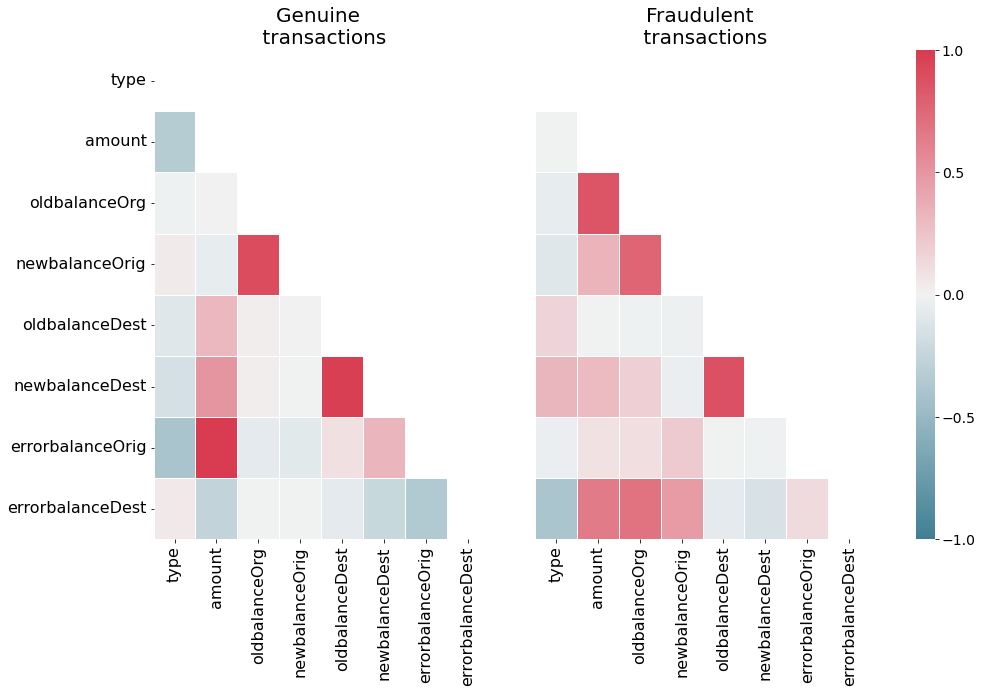

In [69]:
df_new_fraud = X.loc[y == 1] # update Xfraud & XnonFraud with cleaned data
df_new_nonfraud = X.loc[y == 0]
                  
correlationNonFraud = df_new_nonfraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Genuine \n transactions', size = 20)

correlationFraud = df_new_fraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraudulent \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

## Machine Learning to Detect Fraud in Skewed Data
- Having obtained evidence from the plots above that the data now contains features that make fraudulent transactions clearly detectable, the remaining obstacle for training a robust ML model is the highly imbalanced nature of the data.

In [71]:
print('skew = {}'.format( len(df_new_fraud) / float(len(X)) ))

skew = 0.002964544224336551


**Selection of metric**: Since the data is highly skewed, I use the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC). This is because the AUPRC is more sensitive to differences between algorithms and their parameter settings rather than the AUROC.

**Selection of ML algorithm:** A first approach to handle imbalanced data is to discard the majority class and balance it before applying the ML algorithm. The downside of undersampling is that almost all information is discarded, so models trained  this way do not perform well on real biased test data. A better approach is to oversample the minority classes, such as using the synthetic minority oversampling (SMOTE) technique included in the 'imblearn' library. This motivated me to experiment with different anomaly detection and supervised learning approaches. However, we found that the best results were obtained on the original dataset  using an ML algorithm based on a set of decision trees that performed well on imbalanced data. Such algorithms not only allow us to build models that deal with  missing values ​​in our data, but of course also speed them up through parallel processing. Among these algorithms, the Extreme Gradient Boosting (XGBoost) algorithm used below is slightly better than Random Forest. Finally,  like some other ML algorithms, XGBoost allows  the positive classes to be weighted more heavily compared to the negative classes. This also allows you to account for data skew.

In [73]:
# Split the data into training and test sets in a 80:20 ratio

trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [74]:
weights = (y == 0).sum() / (1.0 * (y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY, \
                                              probabilities[:, 1])))

AUPRC = 0.996797700503057


#### What are the important features for the ML model?
- The figure below shows that the new feature errorBalanceOrig that we created is the most relevant feature for the model. The features are ordered based on the number of samples affected by splits on those features.

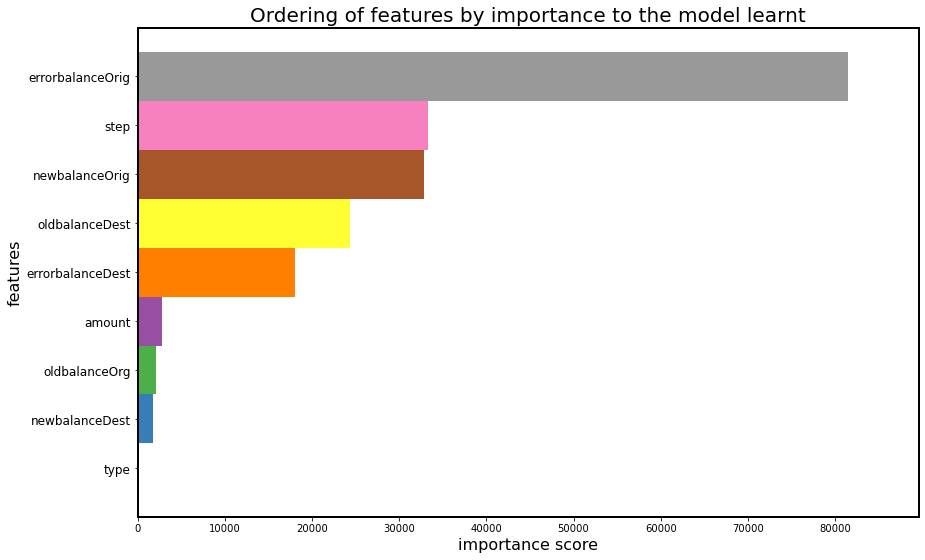

In [75]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

**Visualization of ML model**
- The root node in the decision tree visualized below is indeed the feature errorBalanceOrig, as would be expected from its high significance to the model.


### Bias-variance tradeoff
- The model we have learnt has a degree of bias and is slighly underfit. This is indicated by the levelling in AUPRC as the size of the training set is increased in the cross-validation curve below. The easiest way to improve the performance of the model still further is to increase the max_depth parameter of the XGBClassifier at the expense of the longer time spent learning the model. Other parameters of the classifier that can be adjusted to correct for the effect of the modest underfitting include decreasing min_child_weight and decreasing reg_lambda.

In [76]:
trainSizes, trainScores, crossValScores = learning_curve(\
XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4), trainX,\
                                         trainY, scoring = 'average_precision')

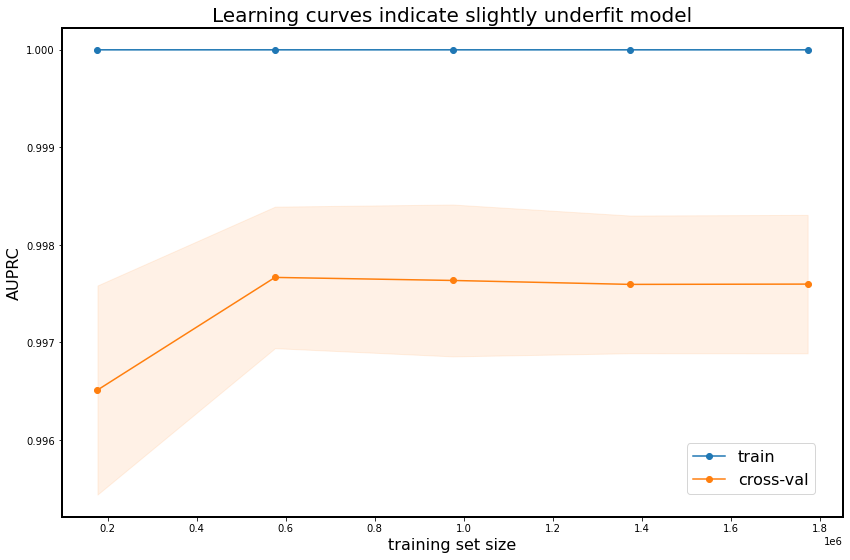

In [77]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
    trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
    crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
         color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

## Conclusion
- **We thoroughly interrogated the data at the outset to gain insight into which features could be discarded and those which could be valuably engineered. The plots provided visual confirmation that the data could be indeed be discriminated with the aid of the new features. To deal with the large skew in the data, we chose an appropriate metric and used an ML algorithm based on an ensemble of decision trees which works best with strongly imbalanced classes. The method used in this problem should therefore be broadly applicable to a range of such problems.**